In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
aminoacid_embeddings = np.load("./ec_embeddings_v1/ec_v1_contrastive_8m_v3_aminoacid_embeddings.npy")
codon_embeddings = np.load("./ec_embeddings_v1/ec_v1_contrastive_8m_v3_codon_embeddings.npy")
esm8m_embeddings = np.load("./ec_embeddings_v1/ec_v1_test_8m_esm2_aminoacid_embeddings.npy") 

labels = np.load("./ec_data_v1/ec_v1_test_labels.npy")
labels = np.array([".".join(label.split('.')[:2]) for label in labels]) # Only consider the first two EC levels (e.g., 1.1)

# ESM 8M performance on predicting EC classes

In [3]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(esm8m_embeddings)

/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


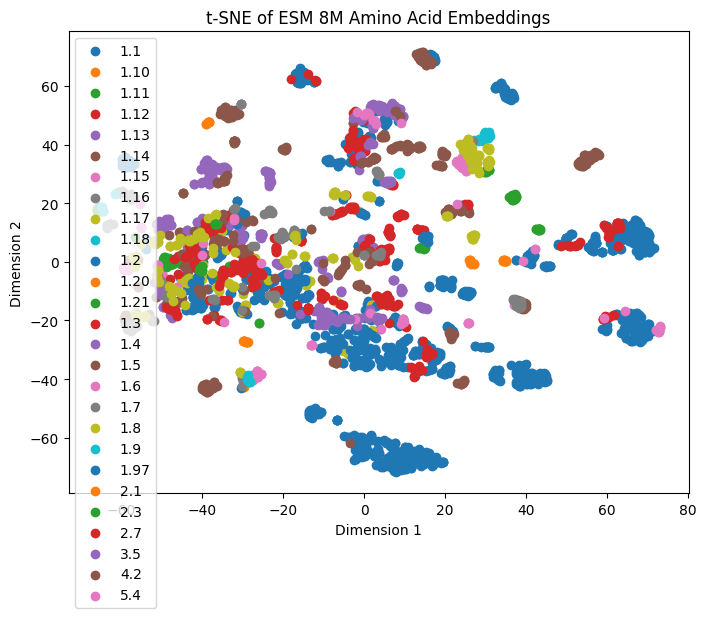

In [4]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
for category in np.unique(labels):
    category_indices = (labels == category)
    plt.scatter(embedded_data[category_indices, 0], embedded_data[category_indices, 1], label=category)

plt.title('t-SNE of ESM 8M Amino Acid Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(esm8m_embeddings, labels, stratify=labels, test_size=0.2, random_state=42)

clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)

print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.8937677053824362


/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# Contrastive 8M amino acid performance on predicting GC content

In [6]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(aminoacid_embeddings)

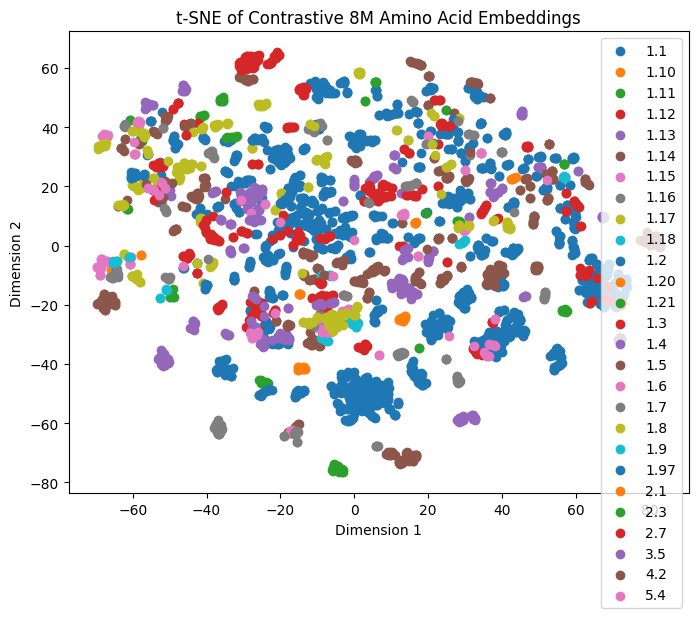

In [7]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
for category in np.unique(labels):
    category_indices = (labels == category)
    plt.scatter(embedded_data[category_indices, 0], embedded_data[category_indices, 1], label=category)

plt.title('t-SNE of Contrastive 8M Amino Acid Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(aminoacid_embeddings, labels, stratify=labels, test_size=0.2, random_state=42)

clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)

print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.9660056657223796


/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# Contrastive 8M codon performance on predicting GC content

In [9]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(codon_embeddings)

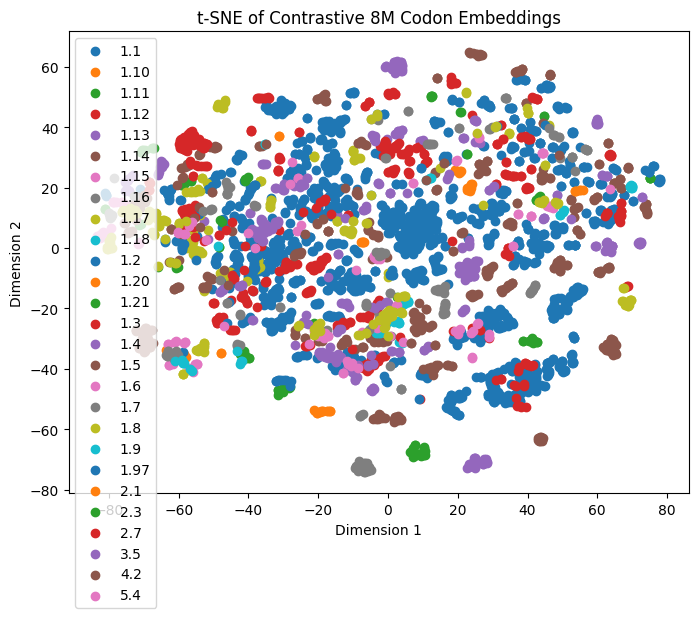

In [10]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
for category in np.unique(labels):
    category_indices = (labels == category)
    plt.scatter(embedded_data[category_indices, 0], embedded_data[category_indices, 1], label=category)

plt.title('t-SNE of Contrastive 8M Codon Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(codon_embeddings, labels, stratify=labels, test_size=0.2, random_state=42)

clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)

print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.9603399433427762


/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# Contrastive (8M) v.s. ESM (8M) performance on predicting EC classification

| Model                  | Score   |
|------------------------|---------|
| ESM 8M                 | 0.8937  |
| Contrastive 8M Amino Acid | 0.9660  |
| Contrastive 8M Codon   | 0.9603  |